***
### **Trabalho Algoritmos Não-Supervisionados para clusterização**
***
##### **Aluno**: José Victor Cavalcante Azevedo
##### **Professor**: Luiz Frias
***

 Este trabalho foi realizado utilizando um ambiente virtual Anaconda. As seguintes bibliotecas foram instaladas utilizando **conda**:
 - numpy
 - scipy
 - pandas
 - matplot
 - seaborn
 - sklearn

In [1]:
import numpy as np
import scipy
import scipy.spatial

import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook', style='darkgrid', palette = 'Set2')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

## Importação da base de dados e checagem dos dados

In [2]:
df = pd.read_csv("data/Country-data.csv", sep=',', index_col=0)
df.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Equatorial Guinea,111.0,85.800,4.48,58.9000,33700,24.90,60.9,5.21,17100
Belize,18.8,58.200,5.20,57.5000,7880,1.14,71.4,2.71,4340
Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
Venezuela,17.1,28.500,4.91,17.6000,16500,45.90,75.4,2.47,13500
Timor-Leste,62.6,2.200,9.12,27.8000,1850,26.50,71.1,6.23,3600
Chad,150.0,36.800,4.53,43.5000,1930,6.39,56.5,6.59,897
Niger,123.0,22.200,5.16,49.1000,814,2.55,58.8,7.49,348
Chile,8.7,37.700,7.96,31.3000,19400,8.96,79.1,1.88,12900
Ghana,74.7,29.500,5.22,45.9000,3060,16.60,62.2,4.27,1310


In [3]:
pd.options.display.max_colwidth = 300

In [4]:
df_dic = pd.read_csv("data/data-dictionary.csv", sep=',', index_col=0)
df_dic

,Description
Column Name,
country,Name of the country
child_mort,Death of children under 5 years of age per 1000 live births
exports,Exports of goods and services per capita. Given as %age of the GDP per capita
health,Total health spending per capita. Given as %age of GDP per capita
imports,Imports of goods and services per capita. Given as %age of the GDP per capita
Income,Net income per person
Inflation,The measurement of the annual growth rate of the Total GDP
life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.


In [5]:
print("Número total de países: ",df.index.unique().size)

Número total de países:  167


In [6]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 17.1+ KB


## Data Understanding

A base de dados consiste em dados de características socio-econômicas (PIB per capita, exportações, importações, investimento em saúde, renda per capita e inflação ) e de saúde (mortalidade infantil, expectativa de vida e taxa de fertilidade) que determinam o índice de desenvolvimento de 167 países.

Verificado que não há dados vazios ou nulos. Todos os dados são numéricos (quantitativos), não há dados categóricos (qualitativos).

A seguir observamos a média, desvio-padrão, median, quartis e os valores máximos e mínimos.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


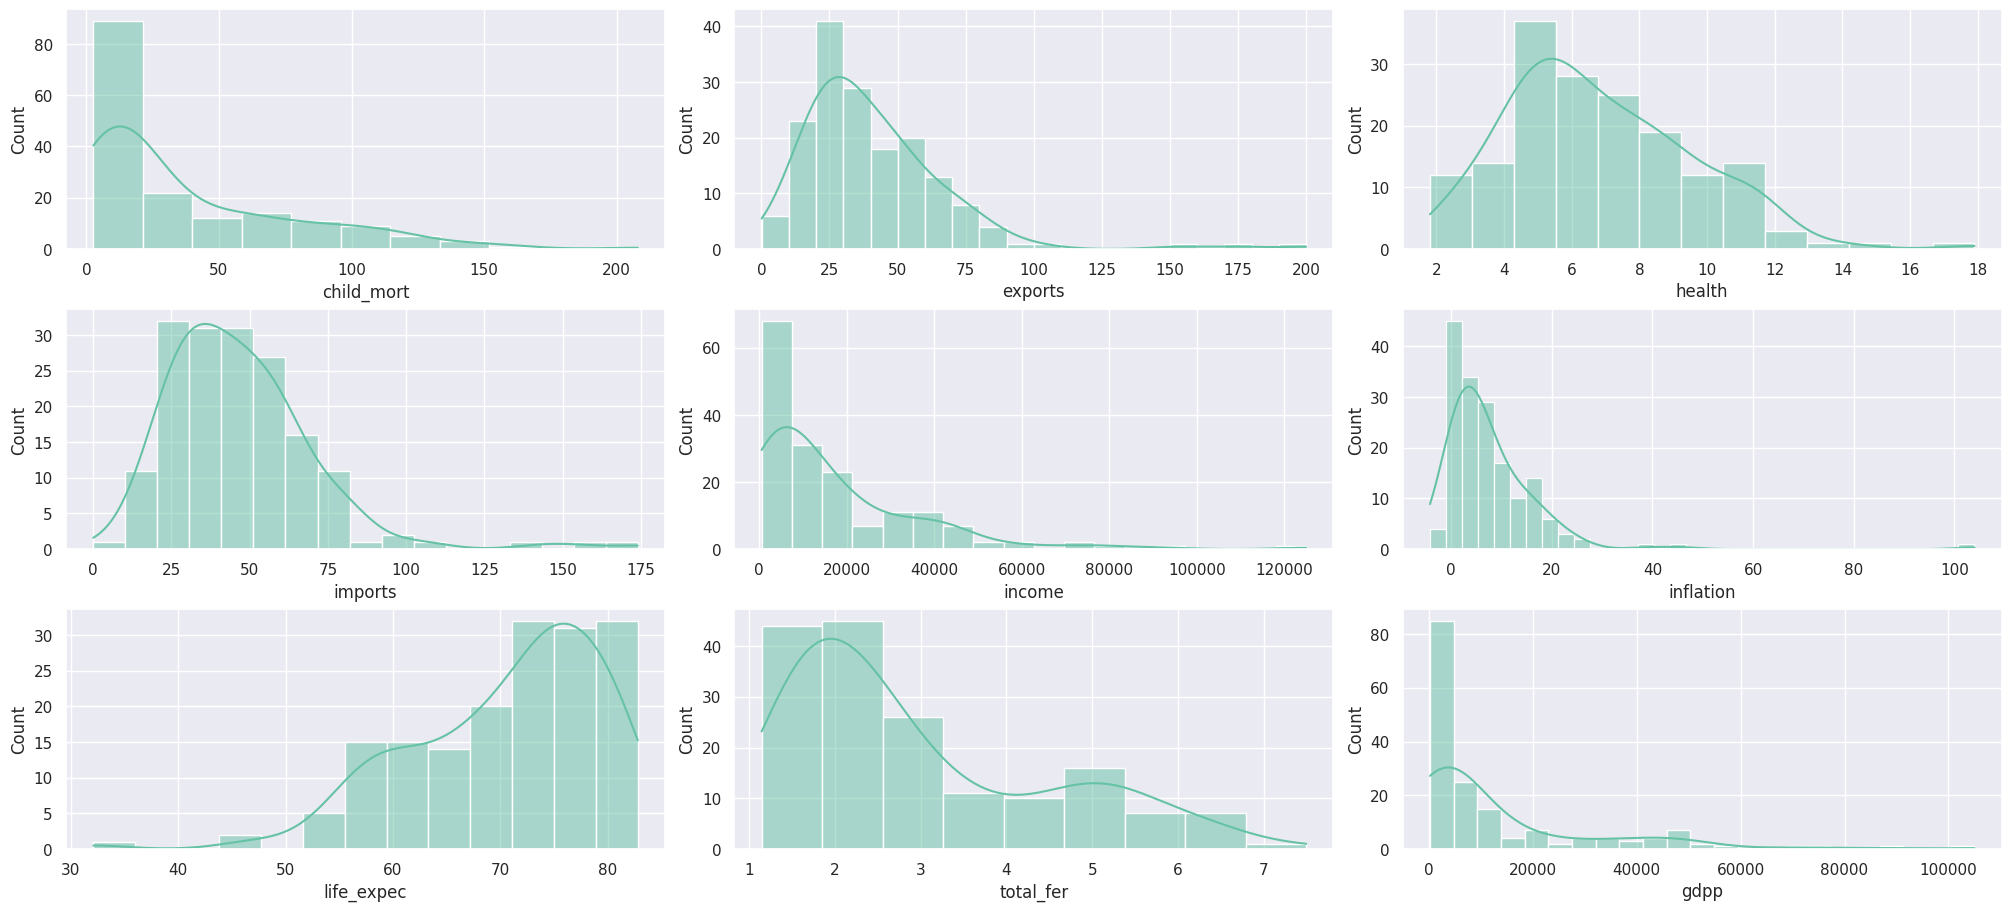

In [10]:
fig, ax = plt.subplots(3,3, figsize=(20,9), constrained_layout=True)
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(x=df[i], ax=ax[x], kde=True)

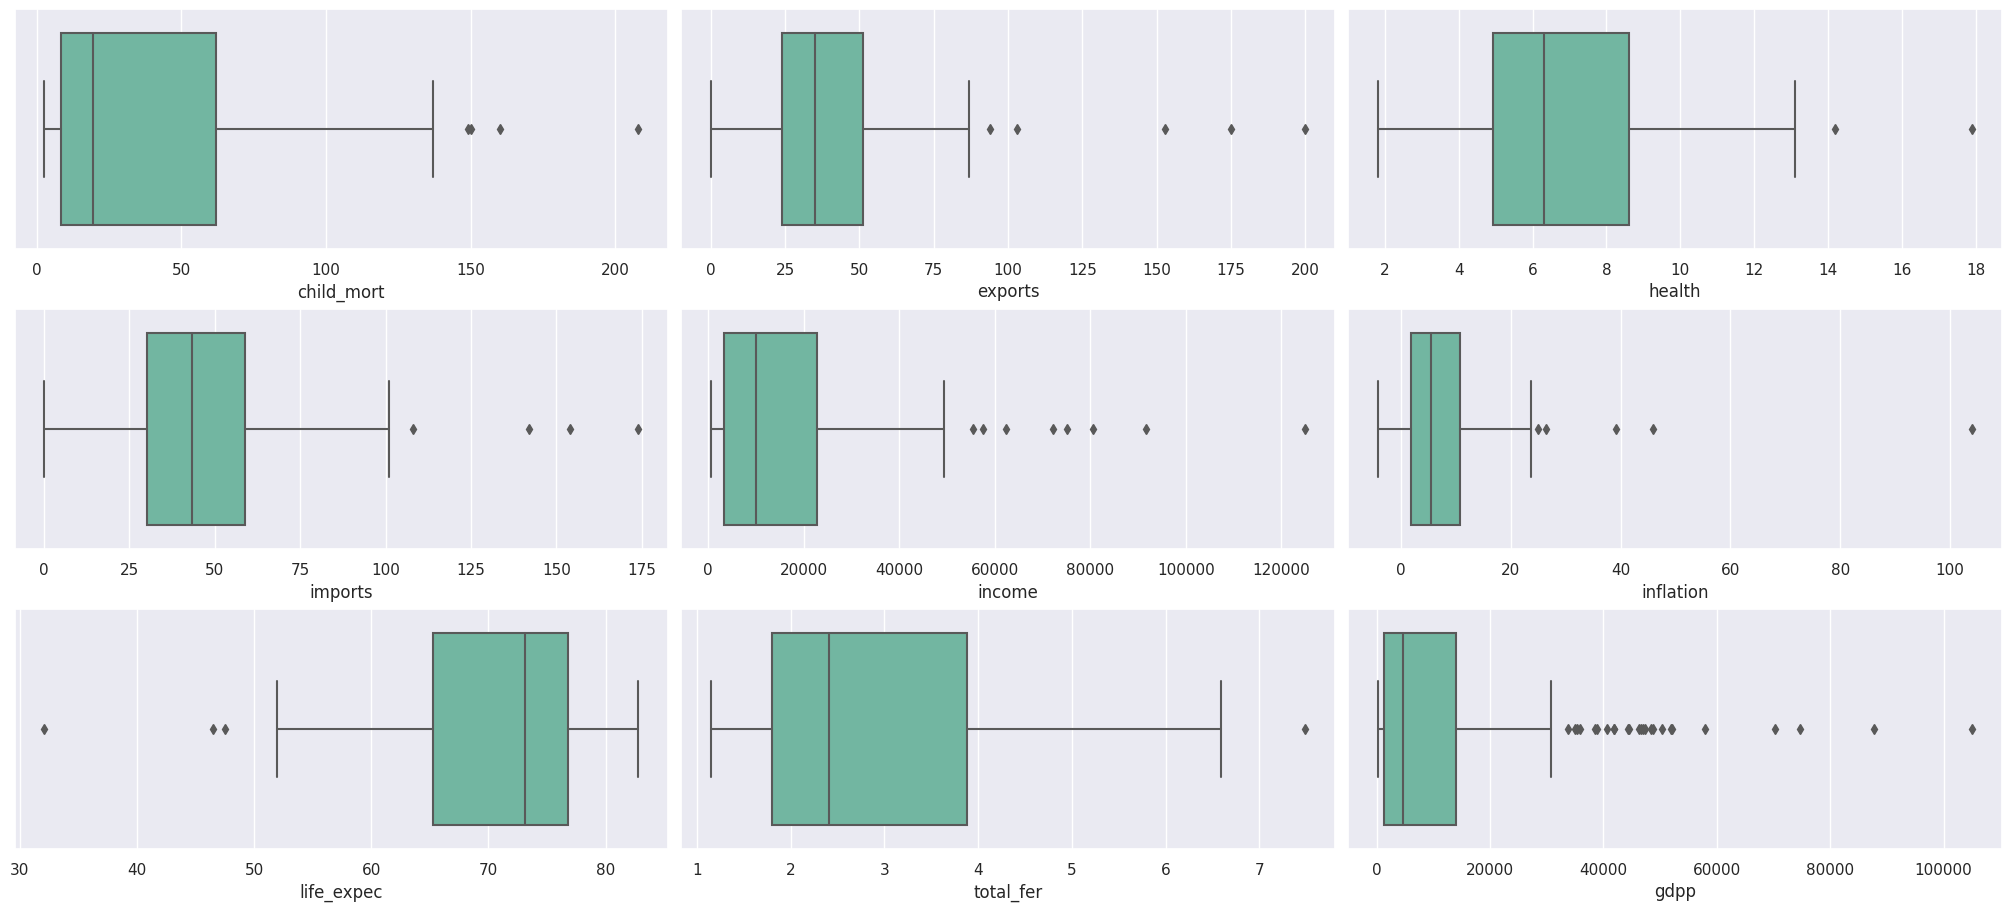

In [11]:
fig, ax = plt.subplots(3,3, figsize=(20,9), constrained_layout=True)
ax=ax.flatten()
int_cols= df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(x=df[i], ax=ax[x])

In [12]:
df.sort_values('income',ascending=False).head(10)['income']

country
Qatar                   125000
Luxembourg               91700
Brunei                   80600
Kuwait                   75200
Singapore                72100
Norway                   62300
United Arab Emirates     57600
Switzerland              55500
United States            49400
Ireland                  45700
Name: income, dtype: int64

In [13]:
df.sort_values('gdpp',ascending=False)[0:10].head(10)['gdpp']

country
Luxembourg       105000
Norway            87800
Switzerland       74600
Qatar             70300
Denmark           58000
Sweden            52100
Australia         51900
Netherlands       50300
Ireland           48700
United States     48400
Name: gdpp, dtype: int64

In [14]:
df.sort_values('inflation',ascending=False).head(10)['inflation']

country
Nigeria              104.0
Venezuela             45.9
Mongolia              39.2
Timor-Leste           26.5
Equatorial Guinea     24.9
Yemen                 23.6
Sri Lanka             22.8
Angola                22.4
Argentina             20.9
Congo, Dem. Rep.      20.8
Name: inflation, dtype: float64

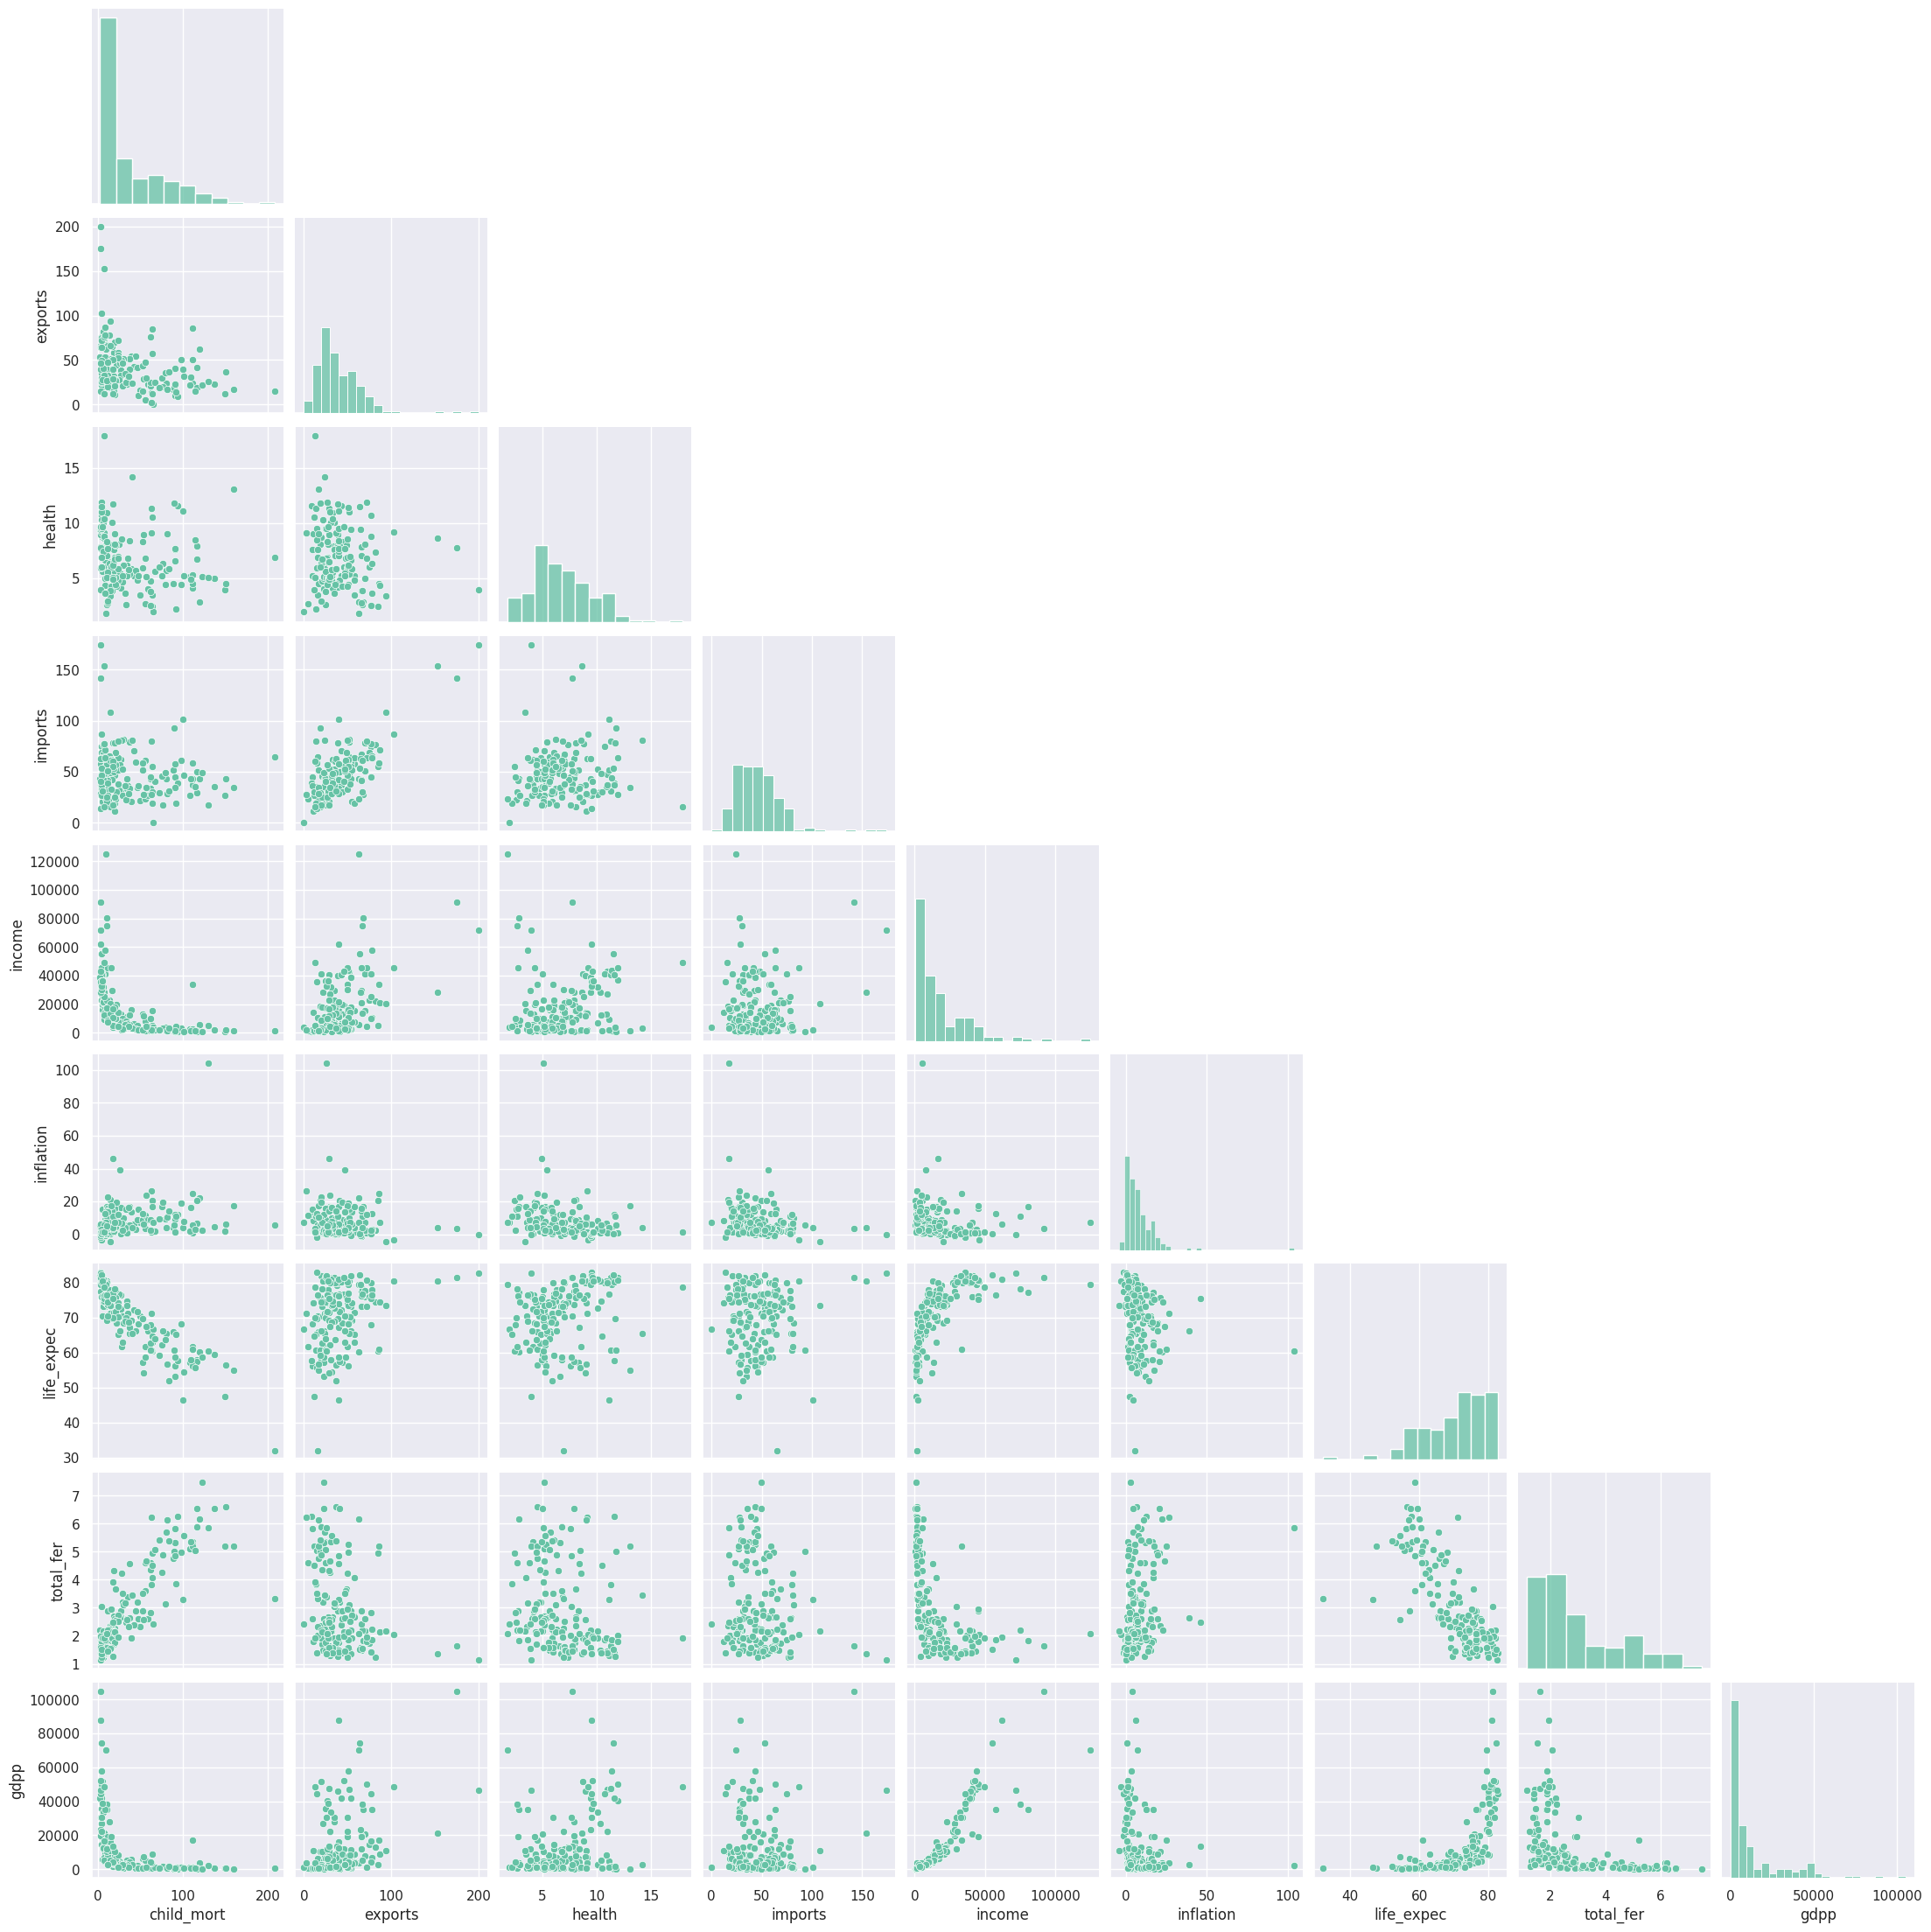

In [15]:
sns.pairplot(df, corner=True)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df))
df_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
0,167.0,-3.722904e-17,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
1,167.0,2.127373e-16,1.003008,-1.500192,-0.633337,-0.223528,0.374720,5.813835
2,167.0,5.504579e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
3,167.0,2.765585e-16,1.003008,-1.939940,-0.691479,-0.148743,0.491353,5.266181
4,167.0,-7.977650e-17,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
5,167.0,-1.063687e-17,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
6,167.0,3.696311e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
7,167.0,3.044803e-16,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
8,167.0,5.850277e-17,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


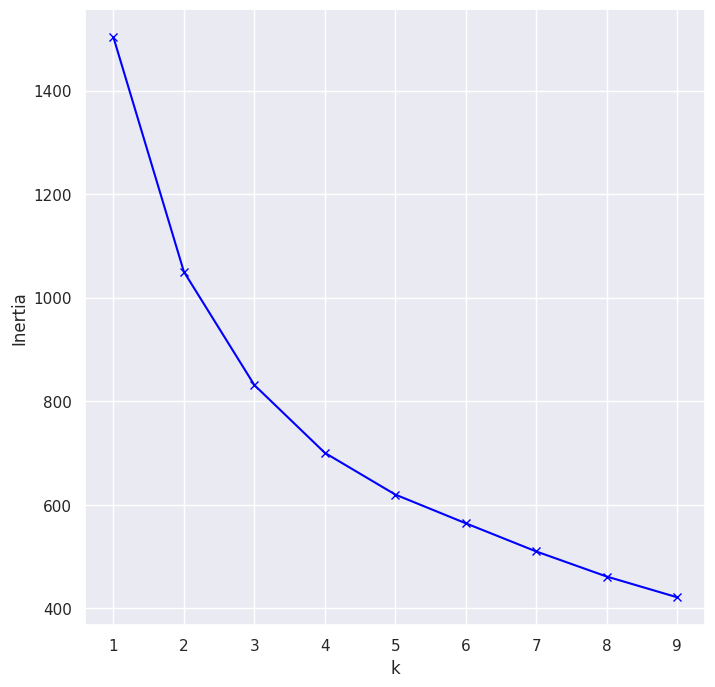

In [17]:
def plot_inertia(df, kmin=1, kmax=10, figsize=(8, 8)):
    _range = range(kmin, kmax)
    inertias = []
    for k in _range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=figsize)
    plt.plot(_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()
    
plot_inertia(df_normalized)

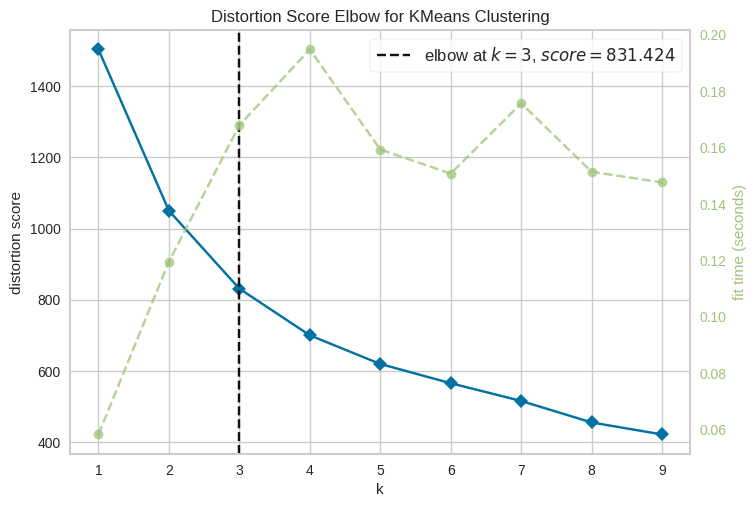

In [18]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df_normalized); 
visualizer.poof();

In [19]:
model = KMeans(n_clusters=3, random_state=42)
model_fit = model.fit(df_normalized)

In [20]:
cluster_df = df.copy()
cluster_df['kmeas_cluster'] = model.labels_
cluster_df.sample(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeas_cluster
country,,,,,,,,,,
Mauritania,97.4,50.70,4.41,61.2,3320,18.900,68.2,4.98,1200,1
Gabon,63.7,57.70,3.50,18.9,15400,16.600,62.9,4.08,8750,1
Grenada,14.6,23.80,5.86,49.2,11200,0.480,71.3,2.24,7370,2
Tonga,17.4,12.40,5.07,60.3,4980,3.680,69.9,3.91,3550,2
Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,1
Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000,0
Sweden,3.0,46.20,9.63,40.7,42900,0.991,81.5,1.98,52100,0
Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,2
Vietnam,23.3,72.00,6.84,80.2,4490,12.100,73.1,1.95,1310,2


In [21]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_model.fit(df_normalized)

cluster_df['hier_cluster'] = agg_model.labels_

Text(0, 0.5, 'Euclidean Distance')

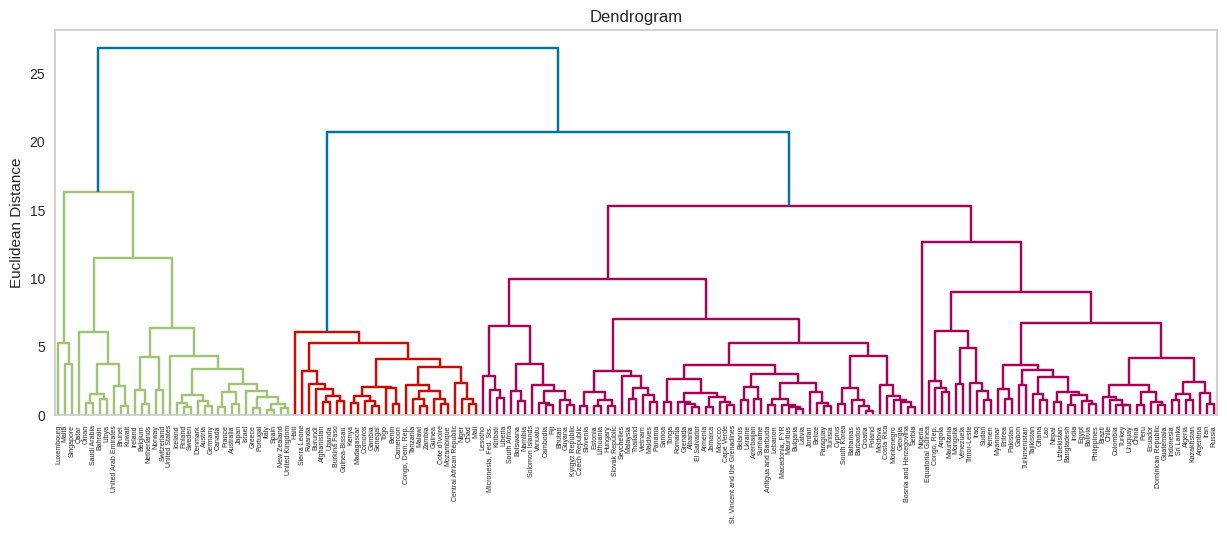

In [22]:
plt.figure(figsize=(15, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df_normalized, method='ward'), labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [23]:
for i in range(3):
  print(f'\nCluter k-means {i}: ', cluster_df[cluster_df['kmeas_cluster']==i].index.values)
  print('Número de países: ', cluster_df['kmeas_cluster'].value_counts()[i])
  print(f'\nCluter hierarchical {i}: ', cluster_df[cluster_df['hier_cluster']==i].index.values)
  print('Número de países: ', cluster_df['hier_cluster'].value_counts()[i])


Cluter k-means 0:  ['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Cyprus'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kuwait' 'Luxembourg'
 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Portugal' 'Qatar'
 'Singapore' 'Slovak Republic' 'Slovenia' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'United Arab Emirates' 'United Kingdom' 'United States']
Número de países:  36

Cluter hierarchical 0:  ['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Iceland' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kuwait' 'Libya' 'Luxembourg' 'Malta' 'Netherlands'
 'New Zealand' 'Norway' 'Oman' 'Portugal' 'Qatar' 'Saudi Arabia'
 'Singapore' 'Spain' 'Sweden' 'Switzerland' 'United Arab Emirates'
 'United Kingdom' 'United States']
Número de países:  34

Cluter k-means 1:  ['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Repub

In [24]:
cluster_df['kmeas_cluster'] = cluster_df['kmeas_cluster'].map({0: 'Developed', 1: 'Underdeveloped', 2: 'Developing'})
cluster_df['hier_cluster'] = cluster_df['hier_cluster'].map({0: 'Developed', 2: 'Underdeveloped', 1: 'Developing'})

In [25]:
cluster_df.groupby('kmeas_cluster').mean()

/tmp/ipykernel_68435/1155983724.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_df.groupby('kmeas_cluster').mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
kmeas_cluster,,,,,,,,,
Developed,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
Developing,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
Underdeveloped,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979


In [26]:

cluster_df.groupby('hier_cluster').mean()

/tmp/ipykernel_68435/2727579261.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_df.groupby('hier_cluster').mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
hier_cluster,,,,,,,,,
Developed,5.961765,58.508824,8.501176,48.902941,47588.235294,4.115500,79.982353,1.888529,43170.588235
Developing,31.617925,39.990368,6.353679,48.085527,11341.886792,9.120604,70.921698,2.654623,6407.367925
Underdeveloped,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889


In [27]:
cluster_df['match']=cluster_df['kmeas_cluster']==cluster_df['hier_cluster']
cluster_df['match'].value_counts()

True     139
False     28
Name: match, dtype: int64

In [28]:
cluster_df.loc[cluster_df['match'] == False]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeas_cluster,hier_cluster,match
country,,,,,,,,,,,,
Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,Underdeveloped,Developing,False
Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,Underdeveloped,Developing,False
"Congo, Rep.",63.9,85.10,2.46,54.7,5190,20.700,60.4,4.95,2740,Underdeveloped,Developing,False
Cyprus,3.6,50.20,5.97,57.5,33900,2.010,79.9,1.42,30800,Developed,Developing,False
Czech Republic,3.4,66.00,7.88,62.9,28300,-1.430,77.5,1.51,19800,Developed,Developing,False
Equatorial Guinea,111.0,85.80,4.48,58.9,33700,24.900,60.9,5.21,17100,Underdeveloped,Developing,False
Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,Underdeveloped,Developing,False
Gabon,63.7,57.70,3.50,18.9,15400,16.600,62.9,4.08,8750,Underdeveloped,Developing,False
Ghana,74.7,29.50,5.22,45.9,3060,16.600,62.2,4.27,1310,Underdeveloped,Developing,False


In [29]:
df['kmeas_cluster'] = cluster_df['kmeas_cluster'].values
df['hier_cluster'] = cluster_df['hier_cluster'].values


/home/victor/.local/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


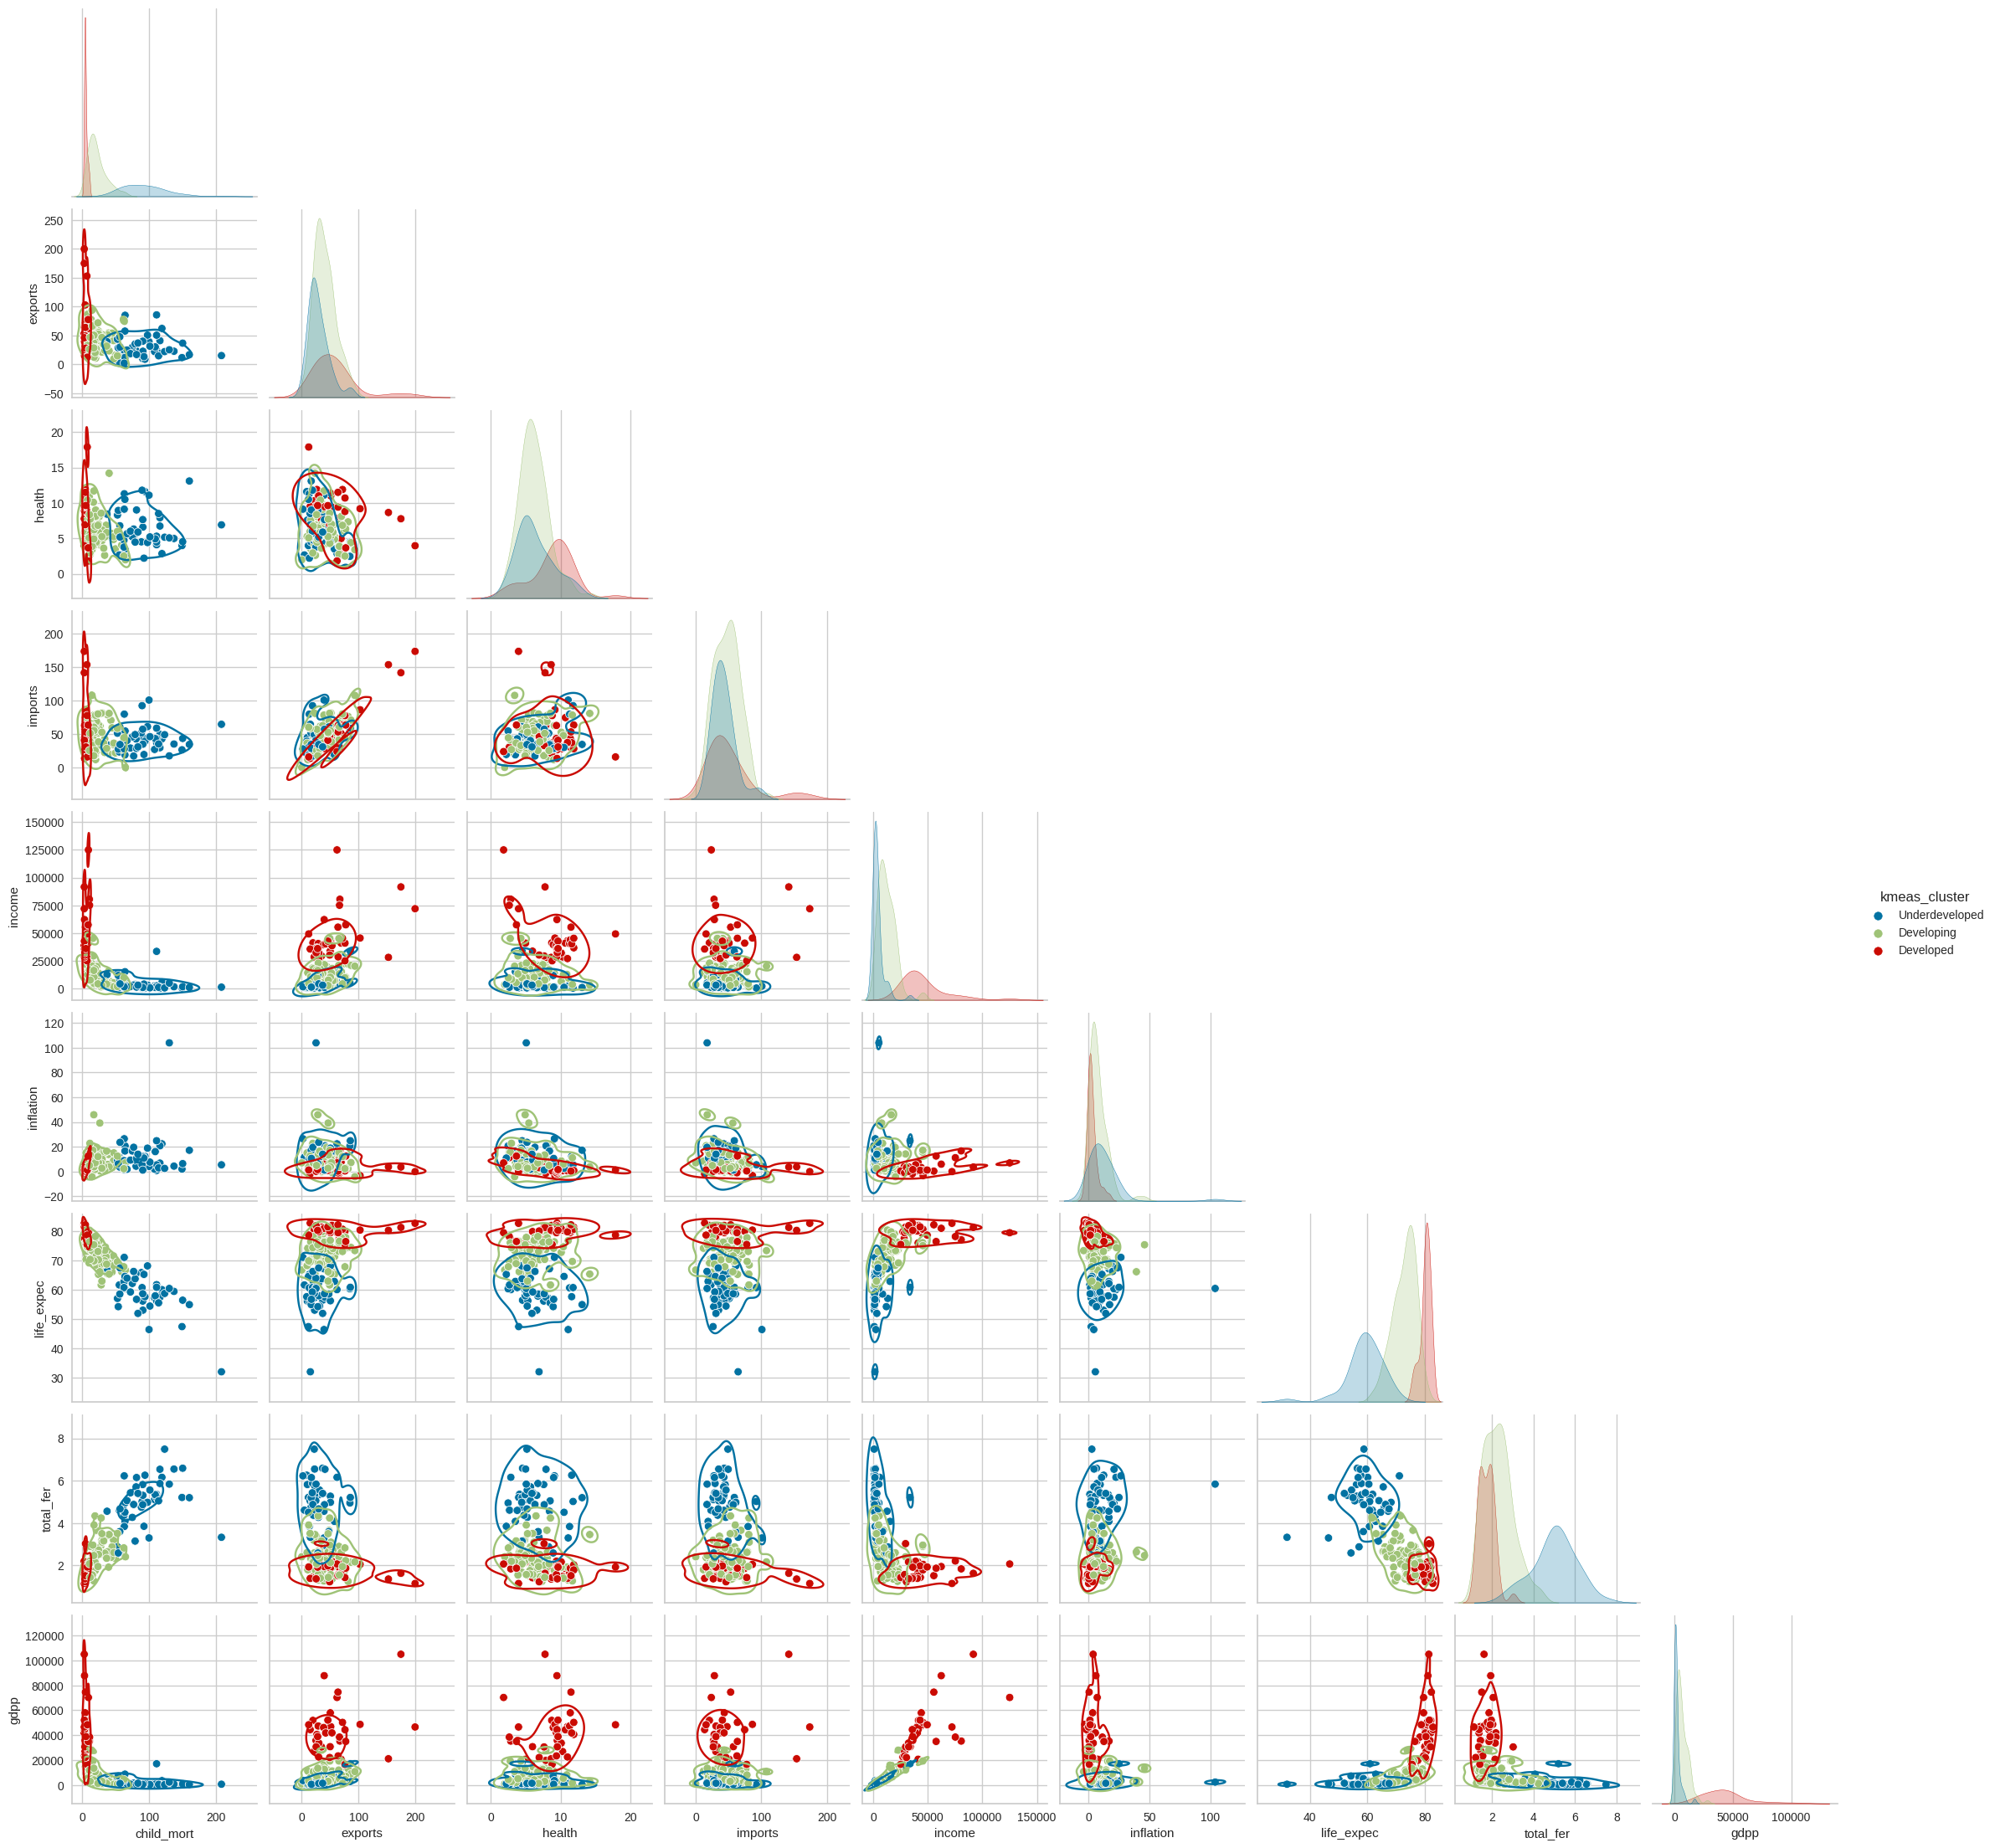

In [30]:
g = sns.pairplot(df, hue='kmeas_cluster', diag_kind='kde', corner=True)
_ = g.map_lower(sns.kdeplot, levels=1, color=".2")

/home/victor/.local/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/victor/.local/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/victor/.local/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/victor/.local/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/victor/.local/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/victor/.local/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contou

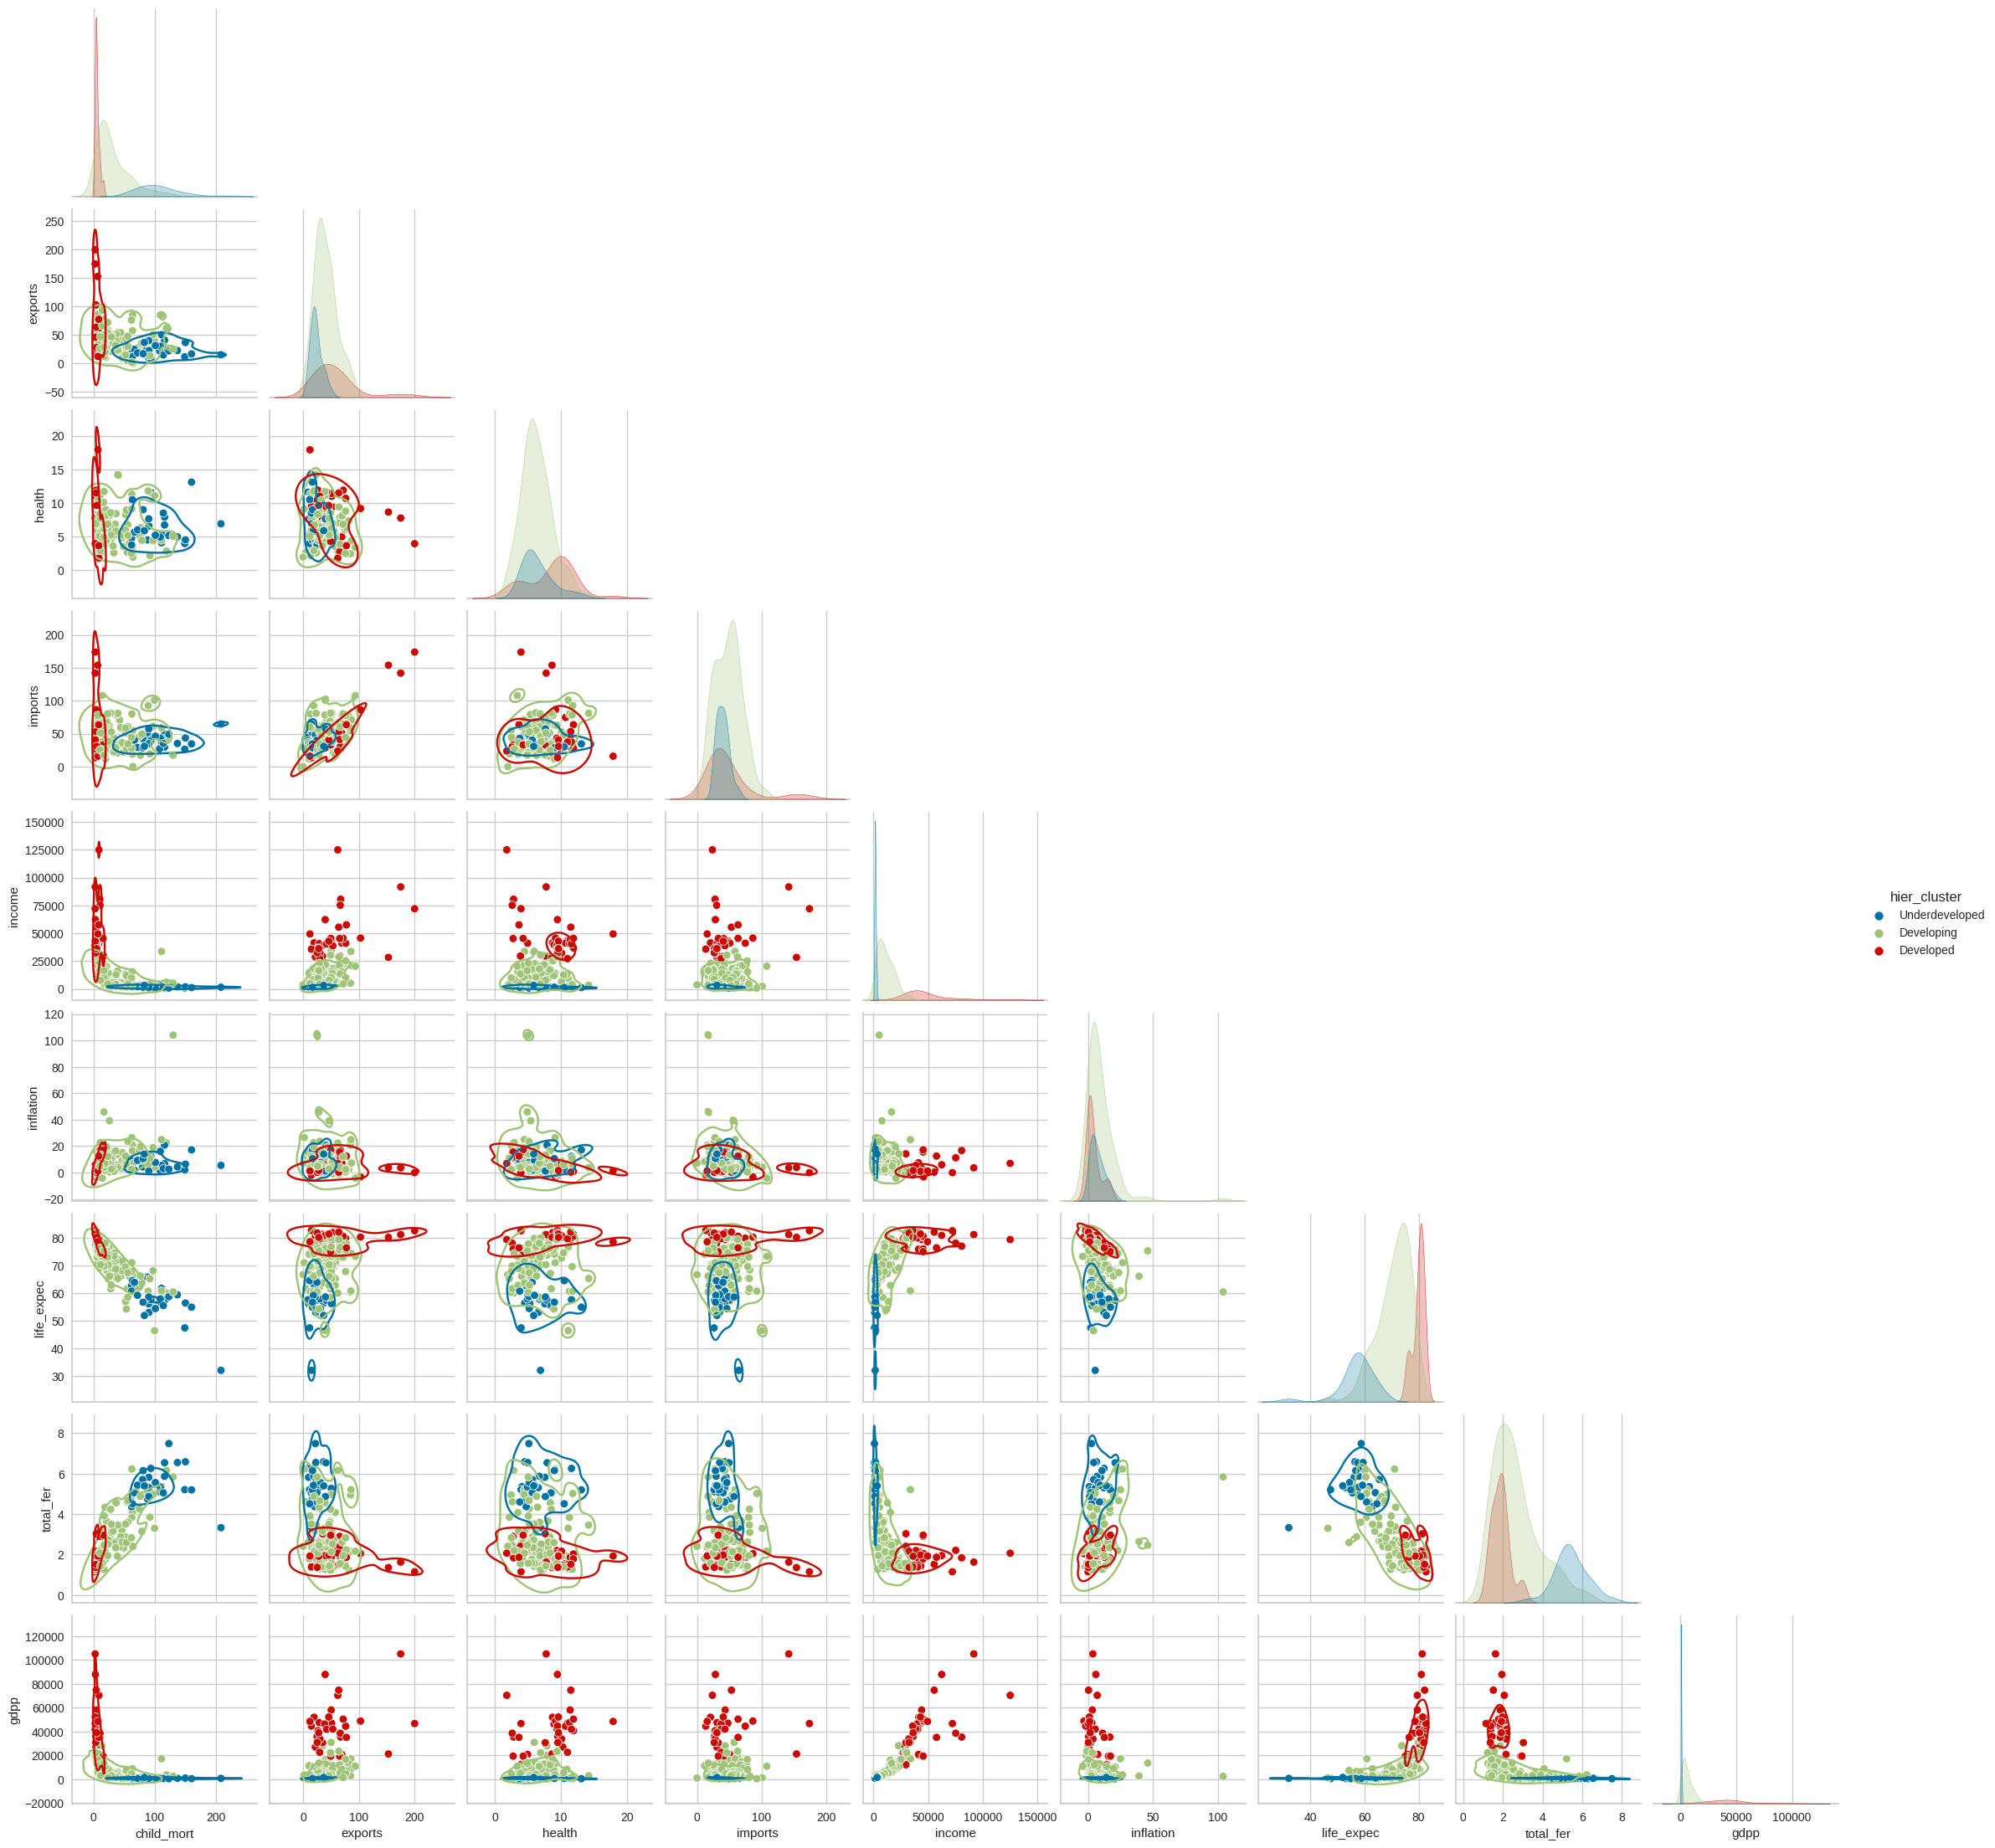

In [31]:
g = sns.pairplot(df, hue='hier_cluster', diag_kind='kde', corner=True)
_ = g.map_lower(sns.kdeplot, levels=1, color=".2")

Text(0.5, 1.0, 'Cores segundo Hierarchical')

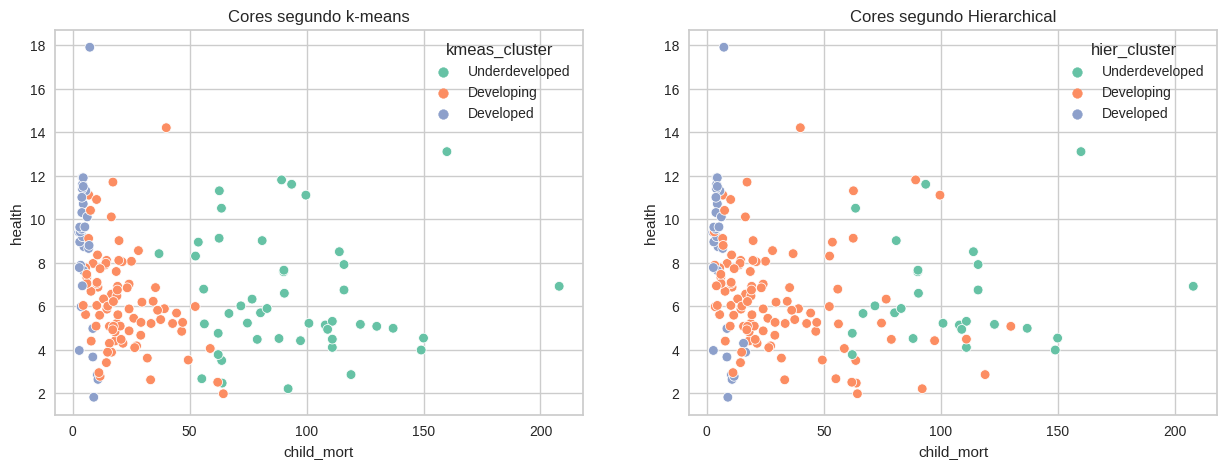

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot( x='child_mort', y='health', hue = 'kmeas_cluster' ,data = cluster_df, palette='Set2', ax=axs[0])
axs[0].set_title('Cores segundo k-means')
sns.scatterplot( x='child_mort', y='health', hue = 'hier_cluster' ,data = cluster_df, palette='Set2', ax=axs[1])
axs[1].set_title('Cores segundo Hierarchical')

In [33]:
def plot_cluster_points(df, labels, ax=None):
  pca = PCA(2) 
  pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
  pca_data['cluster'] = pd.Categorical(labels)
  sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data, ax=ax)

Text(0.5, 1.0, 'Cores segundo Hierarchical')

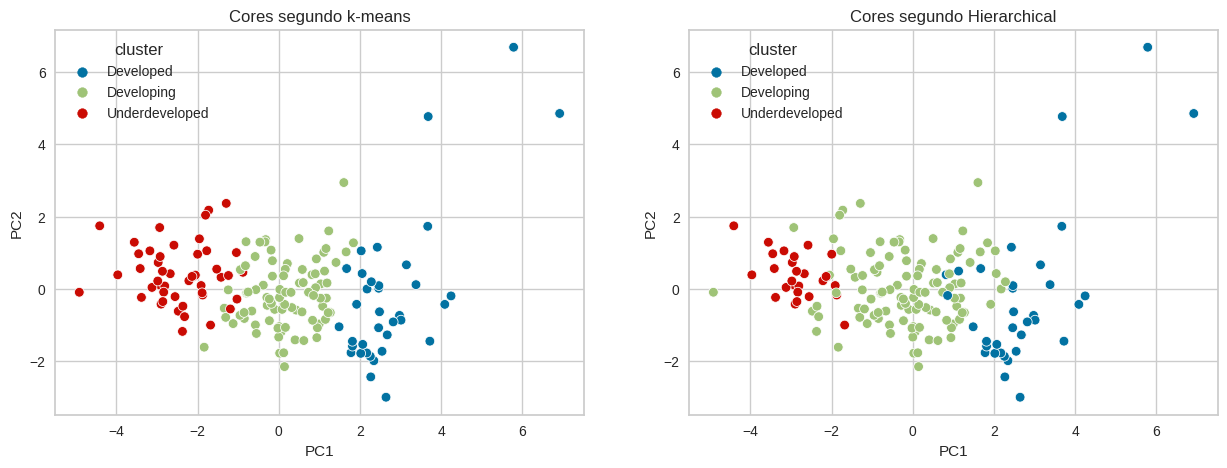

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot_cluster_points(df_normalized,cluster_df['kmeas_cluster'].values, ax=axs[0])
axs[0].set_title('Cores segundo k-means')
plot_cluster_points(df_normalized, cluster_df['hier_cluster'].values, ax=axs[1])
axs[1].set_title('Cores segundo Hierarchical')

### Escolha de algoritmos:

##### 1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.
   1. Primeiro, precisa-se definir um ‘*K*’, ou seja, um número de clusters;
   2. Depois, precisa-se definir, aleatoriamente, um centroide para cada cluster;
   3. O próximo passo é calcular, para cada ponto, o centroide de menor distância. Cada ponto pertencerá ao centroide mais próximo;
   4. Agora, deve-se reposicionar o centróide. A nova posição do centroide deve ser a média da posição de todos os pontos do cluster.
   5. Os dois últimos passos são repetidos, iterativamente até um limite de iterações ou que os centróides não se desloquem mais do que um valor mínimo determinado.
     
##### 2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo. *Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.*
   Como descrito no enunciado, a centróide é o baricentro de um cluster, não sendo necessariamente um dado concreto e sim um ponto no espaço. Uma variação do K-means é o K-metóide ou PAM (Partitioning Around Medoids), no qual um cluster sempre vai ser representado por um dado real. Um medoid pode ser definido como o objeto de um cluster cuja dissimilaridade média para todos os objetos no cluster é mínima, ou seja, é um ponto localizado mais centralmente no cluster.
   1. Primeiro, precisa-se definir um ‘*K*’, ou seja, um número de clusters;
   2. Depois, precisa-se definir, aleatoriamente, um objeto para cada cluster;
   3. O próximo passo é calculara matriz de dissimilaridade. E atribuir cada objeto ao metóide mais próximo;
   4. Agora, deve-se escolher o novo metóide do cluster aquele que diminui a o coeficiente de dissimilaridade.
   5. Os dois últimos passos são repetidos, iterativamente até um limite de iterações ou que não haja mais alterações dos metóides.

##### 3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.
   Sim, uma das desvantagens do K-means é o fato de ser sensível a outliers. Isso deve-se ao fato de ser baseado em média e a presença de outliers causam uma distorção no cálculo da centróide.
   
##### 4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py